<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [154]:
import pandas as pd
import psycopg2



In [155]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [156]:
# Считаем число вакансий по id.
query_3_1 = '''select count(id) from vacancies'''


In [157]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма.
df = pd.read_sql_query(query_3_1, connection)
df

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [158]:
# Счиатем количество работодателей по их id.
query_3_2 = '''select count(id) from public.EMPLOYERS'''


In [159]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма.
df = pd.read_sql_query(query_3_2, connection)
df

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [160]:
# Считаем количество регионов по их id.
query_3_3 = '''select count(id) from areas'''

In [161]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма
df = pd.read_sql_query(query_3_3, connection)
df

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [162]:
# Считаем количество сфер деятельности по их id.
query_3_4 = '''select count(id) from industries'''


In [163]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма
df = pd.read_sql_query(query_3_4, connection)
df

,count
0,294


***

В базе находится почти 49197 вакансий при более, чем вдвое меньшем числе работодателей (23501), которые ищут специалистов из 294 сфер деятельности в 1362 регионах.  

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [164]:
# Соединяем базу с вакансиями и регионами (по ключу id региона), чтобы иметь и имена регионов, и возможность посчитать количество вакансий
#  в них. Группируем по региону, упорядочиваем по убыванию.
query_4_1 = '''
        select 
            a.name area, 
            count(v.id) count 
        from 
            vacancies v
            join areas a on a.id = v.area_id
        group by 1
        order by 2 desc
            ''' 


In [165]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_4_1, connection)
df

,area,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [166]:
#  Считаем число вакансий, используя фильтрацию where: берем в расчет только те вакансии, 
# где хотя бы одно из полей с зарплатой не пустое.
query_4_2 = '''
        select 
            count(id) 
        from 
            vacancies 
        where 
            salary_from is not null 
            or salary_to is not null
            '''


In [167]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде датафрейма.
df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [168]:
# Выводим агрегирующие показатели согласно заданию с помощью оператора avg и функции round.
query_4_3 = '''
        select 
            round(avg(salary_from)) "среднее по нижнее границе",
            round(avg(salary_to)) "среднее по верхней границе"
        from 
            vacancies
           '''

In [169]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма.
df = pd.read_sql_query(query_4_3, connection)
df

,среднее по нижнее границе,среднее по верхней границе
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [170]:
# Группируем по двум критериям, чтобы получить все сочетания типа графика и типа трудоустройства, 
# затем упорядочиваем по убыванию количества вакансий.
query_4_4 = '''
        select 
            schedule,
            employment,
            count(id)
        from 
            vacancies
        group by 1,2
        order by 3 desc
             '''


In [171]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде датафрейма.
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [172]:
# Выводим столбец с опытом, группируя по количеству, чтобы затем отсортировать 
# в порядке возрастания количества вакансий.
query_4_5= '''
        select 
            experience опыт
        from 
            vacancies
        group by experience
        order by count(experience)
           '''


In [173]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_4_5, connection)
df


,опыт
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

In [174]:
# Для дополнительного исследования построим новые столбцы к таблице из запроса 4_1, оставив только топ-5 городов и указав 
# населенность в этих городах (данные Росстата, Белстата и Бюро национальной статистики Казахстана на 2020 год).
#  А так же добавим столбец отношения количества вакансий к численности населения рассматриваемых городов. 
# Предварительно создадим список численности для этих городов:

population_list = [13010, 5602, 2018, 1634, 2001]

query_4_1 = '''
        select 
            a.name area, 
            count(v.id) count 
        from 
            vacancies v
            join areas a on a.id = v.area_id
        group by 1
        order by 2 desc
            ''' 
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде нужного столбца датафрейма.
df_4_1 = pd.read_sql_query(query_4_1, connection)
# Убираем все строки, кроме топ-5 городов
df_4_1_ext = df_4_1.iloc[0:5,:]
# Создаем столбец с численностью
df_4_1_ext['population'] = population_list
# Создаем столбец с процентным соотношением вакансий к численности населения
df_4_1_ext['vac_ratio_%'] = (df_4_1_ext['count']/1000)/df_4_1_ext['population']*100

display(df_4_1_ext)

,area,count,population,vac_ratio_%
0,Москва,5333,13010,0.040992
1,Санкт-Петербург,2851,5602,0.050893
2,Минск,2112,2018,0.104658
3,Новосибирск,2006,1634,0.122766
4,Алматы,1892,2001,0.094553


Из проведенного анализа можно сделать следующие выводы:
   1) Лидером по количеству вакансий является Москва, в ней больше 10% всех анализируемых вакансий. 
А топ пять городов - это Москва (5333), Санкт-Петербург	(2851), Минск (2112), Новосибирск (2006), Алматы (1892). 
    Сами по себе эти цифры немного говорят, так как численность населения данных городов отличается.
Лучше смотреть количество вакансий в зависимости от населенности данных городов. Дат вакансий у нас нет, для наглядности проведения такого исследования предположим, это 2020 год.  
Из дополнительного датафрейма df_4_1_ext видно, что Москва хоть и является лидером по абсолютному количеству вакансий, в процентном отношении к числу ее жителей это всего 0,04%. А Новосибирск, занимающий в абсолюте 4 место, является действительным лидером по числу it вакансий в отношении к числу жителей. За ним идет Минск.
Получается, что на исследуемых данных концентрация поиска айти специалистов выше всего в Новосибирске и Минске. 

2) У большинства вакансий работодатели просят опыт от 1 года до 3 лет (26152). На втором месте от 3 до 6 лет, их вдвое меньше. Вакансии без опыта занимают третье место (7197 вакансий). А опыт более 6 лет встречается в 1337 вакансиях. 
При этом Информацию о зарплате (нижней или верхней границе) указывают лишь половина работодателей. Средняя нижняя граница зарплатной вилки  равна 71065 рублей, а средняя верхняя 110537. Разрыв небольшой, как и сами суммы, это, вероятно, объясняется тем, что из общего числа вакансий (49197) больше половины - работа для специалистов с небольшим опытом, либо вообще без него. Это так же может говорить о растущем рынке айтиспециалистов, растущем спросе на них, так как работодатели готовы нанимать начинающих айтишников. 

3) Абсолютное большинство вакансий (35367)  - это работа с полной занятостью и полным рабочим днем. На втором месте идет полный рабочий день с удаленной занятостью, однако количество таких вакансий уже в пять раз меньше. На третьем месте так же полная занятость при гибком графике, что опять же в несколько раз меньше по количеству в отличие от второго места (1593). Это говорит о том, что большинство работодателей при найме на полный рабочий день не готовы отпускать своих айтиспециалистов на удаленку, большинство хотят видеть их в офисе ежедневно.
   

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [175]:
# Находим работодателя с наибольшим количеством вакансий: выводим работодателей и через группировку выводим количество их
# вакансий из объединной таблицы (вакансии + работодатели по ключу id работодателя), сортируем по убыванию, 
# оставляем топ-3 для дальнейших выводов.   
# Далее, аналогично пишем запрос на вывод работодателя, занимающего 5 место по количеству вакансий, отсекая первые 4 места. 
# Объединяем эти два запроса в одну таблицу через Union.

query_5_1= '''
        (select 
            e.name,
            count(v.id)
        from 
            vacancies v
            join employers e on e.id = v.employer_id
        group by 1
        order by 2 desc
        limit 3)
    union all
        (select 
            e.name,
            count(v.id)
        from vacancies v
            join employers e on e.id = v.employer_id
        group by 1
        order by 2 desc
        offset 4
        limit 1)
            '''

In [176]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_5_1, connection)
df

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [177]:
# Создаем объединенную таблицу с вакансиями, работодателями и регионами через ключ id региона. Используем left join
# так как нам необходимо сохранить все данные таблицы areas (включая регионы, где нет вакансий). Группируем согласно заданию.
# Фильтруем запрос, оставляя только те регионы, где нет вакансий (v.id is null). Сортируем по убыванию, оставляем топ-1.

query_5_2= '''
    select 
        a.name,
        count(e.id) employers_cnt,
        count(v.id) vacancies_cnt
    from 
        areas a
        left join vacancies v on a.id = v.area_id
        left join employers e on a.id = e.area
    where v.id is null
    group by 1
    order by 2 desc
    limit 1
            '''

In [178]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма
df = pd.read_sql_query(query_5_2, connection)
df

,name,employers_cnt,vacancies_cnt
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [179]:
# Cоединяем таблицу работодателей и вакансий через left join, чтобы оставить всех работодателей (включая тех, кто не публикует вакансии).
#  Считаем уникальное количество регионов для каждого работодателя, сортируем по убыванию.

query_5_3= '''
        select 
            e.name "работодатель",
            count(distinct v.area_id) region_cnt
        from 
            employers e
            left join vacancies v on e.id = v.employer_id
        group by 1
        order by 2 desc
           '''

In [180]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_5_3, connection)
df

,работодатель,region_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [181]:
# Из объединенной таблицы работодателей и сфер деятельности выводим число работодателей согласно заданию
# (используем left join, так нам надо сохранить всех работодателей из первой таблицы), 
# используем фильтрацию. 
query_5_4 = '''
        select
            count(e.name)
        from 
            employers e
            left join employers_industries e_i on e.id = e_i.employer_id 
        where industry_id is null
            '''
          

In [182]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма
df = pd.read_sql_query(query_5_4, connection)
df


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [183]:
# Группируем компании по количеству сфер деятельности из объединенной таблицы (работодатели + все сферы их деятельности, сохраняя всех работодателей).
# Применяем фильтрацию having после группировки, оставляя только компании с 4 сферами деятельности. Сортируем компании по алфавиту, отсекаем
# топ 2, выводим только 3 место.

query_5_5 = '''
        select
            e.name,
            count(e_i.industry_id)
        from
            employers e
            left join employers_industries e_i on e.id = e_i.employer_id 
        group by 1
        having 
            count(e_i.industry_id) = 4
        order by 1
        offset 2
        limit 1
            '''

In [184]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма
df = pd.read_sql_query(query_5_5, connection)
df

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [185]:
# Соединяем таблицы работодателей и сфер деятельности через таблицу employers_industries, фильтруем
#  и считаем согласно заданию.

query_5_6 = '''
        select 
            count(e.id)
        from 
            employers_industries e_i
            join employers e on e.id = e_i.employer_id 
            join industries i on i.id = e_i.industry_id 
        where 
            i.name = 'Разработка программного обеспечения'
            '''

In [186]:
# Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде строки датафрейма
df = pd.read_sql_query(query_5_6, connection)
df

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [187]:
# Создаем кортеж из городов-миллионников
cities = ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
'Нижний Новгород', 'Челябинск', 'Красноярск','Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар',
'Воронеж',  'Пермь', 'Волгоград')

In [188]:
# Выводим список городов-миллионников и количество вакансий в них от компании "Яндекс", применяя группировку 
# по городам, а так же фильтрацию по названию компании и принадлежности города к кортежу cities через f-строку.
# Упорядочиваем по числу вакансий по возрастанию. 
# Присоединяем снизу снизу строку total с общим числом вакансий, фильтруя по тем же критериям.
query_5_7 = f'''
        select
            a.name города_миллионники,
        	count(*) количество_вакансий
	    from 
		    employers e
     	    join vacancies v on e.id = v.employer_id
     	    join areas a on a.id = v.area_id
        where 
		    e.name = 'Яндекс'
        	and a.name in {cities}
        group by a.id

	union all

        select 
			'Total',
			count(*)
        from 
		    vacancies v
 	        join employers e on e.id = v.employer_id
 	        join areas a on a.id = v.area_id
        where
		    e.name = 'Яндекс'
  	        and a.name in {cities}
        order by 2
			'''

In [189]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде датафрейма.
df = pd.read_sql_query(query_5_7, connection)
df

,города_миллионники,количество_вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

In [190]:
#Дополнительно создадим запрос, где выведем все сферы деятельности представленных в таблице employers компаний
#  и количество компаний для каждой сферы в порядке убывания. 
query_5_6_6 = '''
        select 
            i.name,
            count(e.id)
        from 
            employers_industries e_i
            join employers e on e.id = e_i.employer_id 
            join industries i on i.id = e_i.industry_id 
        group by 1
        order by 2 desc
            '''
# Используем метод read_sql_query, чтобы получить результаты запроса в виде датафрейма.          
df_5_6_6 = pd.read_sql_query(query_5_6_6, connection)
df_5_6_6

,name,count
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
...,...,...
289,"Лифтовое хозяйство (монтаж, сервис, ремонт)",4
290,Ритуальные услуги,4
291,"Ботанический сад, зоопарк, заповедник",3
292,Автошкола,3


1) Топ-3 по представленности компаний в регионах являются: "Яндекс" (181 регион), "Ростелеком" (152 региона), "Спецремонт" (116 регионов).  При этом "Яндекс" является абсолютным лидером по количеству вакансий, компания ищет 1933 специалиста в области айти, четверть из которых приходится на города миллионники. На втором месте "Ростелеком" (491 вакансия), третье место "Тинькофф" (444 вакансии). Можно сделать вывод, что работа в айти сфере есть далеко не только в столице или городах миллионниках, в регионах тоже широкая представленность. 

2) Из общего количества работодателей (23501) 3553 ищут специалистов в сферу разработки ПО, или 15%. Из дополнительного запроса, выведенного в датафрейм df_5_6_6 так же видно, что это сфера самая многочисленная.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [191]:
# Считаем число вакансий, применяя фильтрацию согласно заданию.
query_6_1 = '''
    select 
        count(id) 
    from 
        vacancies 
    where 
        name ilike '%data%'
   	    or name ilike '%данн%'
            '''

In [192]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде строки датафрейма.
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [193]:
# Считаем число вакансий, удовлетворяющих заданию через фильтрацию where, перечисляя все заданные условия. 
# Чтобы учитывать слова в любом регистре, пользуемся оператором ilike.

query_6_2 = '''
    select 
            count(id) 
    from 
            vacancies 
    where
            (name ilike '%data scientist%' 
            or name ilike '%data science%'
            or name ilike '%исследователь данных%' 
            or (name like '%ML%' and name not ilike '%HTML%')
   	    or name ilike '%machine learning%' or name ilike '%машинн%обучен%')
 	and
 	    (name ilike '%junior%'
  	    or experience = 'Нет опыта'
  	    or employment='Стажировка')
            '''

In [194]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде строки датафрейма.
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [195]:
# Считаем число вакансий, удовлетворяющих заданию через фильтрацию where, перечисляя все заданные условия. 
# Чтобы учитывать слова в любом регистре, пользуемся оператором ilike.

query_6_3 = '''
    select 
            count(id) 
    from
            vacancies 
    where
            (name ilike '%data scientist%' 
            or name ilike '%data science%'
            or name ilike '%исследователь данных%' 
            or (name like '%ML%' and name not ilike '%HTML%')
   	    or name ilike '%machine learning%' or name ilike '%машинн%обучен%')
   	and 
	    (key_skills ilike '%postgres%'
            or key_skills ilike '%SQL%')
	'''

In [196]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде строки датафрейма.
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [197]:
# Считаем число вакансий, удовлетворяющих заданию через фильтрацию where, перечисляя все заданные условия. 
# Чтобы учитывать слова в любом регистре, пользуемся оператором ilike.

query_6_4 = '''
    select 
            count(id) 
    from
            vacancies 
    where
            (name ilike '%data scientist%' 
            or name ilike '%data science%'
            or name ilike '%исследователь данных%' 
            or (name like '%ML%' and name not ilike '%HTML%')
   	    or name ilike '%machine learning%' or name ilike '%машинн%обучен%')
   	and 
	    (key_skills ilike '%Python%')
	'''

In [198]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде строки датафрейма.
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [199]:
# Из таблицы вакансий считаем округленное до двух знков среднее число ключевых навыков.
# Считаем через число символов табуляции: длина строки с ключевыми навыками минус длина 
# этой же строки за вычетом символов табуляции (заменяем их на пустую строку), а тк число навыков
#  больше числа разделяющих их табуляций на 1, прибавялем 1. 
#  Далее фильтруем, перечисляя все заданные условия. 

query_6_5 = '''
select
       round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2)
from
       vacancies
where 
       name ilike '%data scientist%'
       or name ilike '%data science%'
       or name ilike '%исследователь данных%'
       or (name like '%ML%' and name not ilike '%HTML%')
       or name ilike '%machine learning%'
       or name ilike '%машинн%обучен%'
    '''   

In [200]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде строки датафрейма.
df = pd.read_sql_query(query_6_5, connection)
df

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [201]:
# Выводим столбец с опытом и группируем по нему, считая среднюю указанную зарплату для DS по размеру опыта.
# Считаем среднюю зарплату для DS, используя функцию coalesce, которой заменяем null на 0, чтобы 
# в ситуации, когда одно из двух полей с зарплатой не заполнено (стоит null) иметь возможность посчитать их сумму,
# деленную на 2 ((заполненное поле + 0)/2), а не получить null.

query_6_6 = '''
    select
        distinct experience "опыт",
        round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to)), 0) "средняя_ зарплата"
    from
        vacancies 
    where 
        name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or (name like '%ML%' and name not ilike '%HTML%')
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%' 
    group by 1
    '''

In [202]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде датафрейма.
df = pd.read_sql_query(query_6_6, connection)
df

,опыт,средняя_ зарплата
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


***

1) Из проведенного анализа следует, что из почти 50 тысяч вакансий к данным имеют отношение лишь 1771 вакансия или всего 3.5%. При этом непосредственно для начинающих датасайентистов без опыта уровня junior открыта всего 51 вакансия, что совсем ничтожно мало по сравнению с общим рынком вакансий. Для работы с SQL или postgres работодатели ищут немногим больше - 201 вакансия. Для специалистов по данным с владением питона открыта 351 вакансия.
Отсюда следует, что рынок вакансий для специалистов по данным довольно узок, а начинающим датасайентистам без опыта вообще будет довольно сложно найти работу. 
    
2) Для датасайентистов работодатели просят иметь в среднем 6 (почти 6,5) ключевых навыков. 
3) Средняя зарплата для датасайентиста без опыта не превышает 80 тысяч рублей, однако для соискателей с опытом от года она почти вдвое больше. То есть даже небольшой опыт работы от года до трех лет двукратно влияет на среднюю зарплату. Опыт от 3 до 6 лет оценивается работодателями в среднем на 74% ((243115-139675)/139675) выше, чем опыт от года до 3 лет. А для соискателей с опытом от 6 лет средняя зарплата вообще не указывается. Вероятно, таким специалистам она назначается по результатам собеседования уже в частном порядке в зависимости от их компетенций и опыта. 

# Общий вывод по проекту

Мы провели исследование на базе из 49197 вакансий от 23501 работодателя, которые ищут IT специалистов из 294 сфер деятельности в 1362 регионах. 


Лидером по количеству вакансий является Москва, в ней больше 10% всех анализируемых вакансий. 
А топ-5 городов: Москва (5333), Санкт-Петербург	(2851), Минск (2112), Новосибирск (2006), Алматы (1892). 
    Сами по себе эти цифры немного говорят, так как численность населения данных городов отличается.
Лучше смотреть количество вакансий в зависимости от населенности данных городов. Дат вакансий у нас нет, для наглядности проведения такого исследования предположим, это 2020 год.  

In [203]:
# Для дополнительного исследования построим новые столбцы к таблице из запроса 4_1, оставив только топ-5 городов и указав 
# населенность в этих городах (данные Росстата, Белстата и Бюро национальной статистики Казахстана на 2020 год).
#  А так же добавим столбец отношения количества вакансий к численности населения рассматриваемых городов. 
# Предварительно создадим список численности для этих городов:
display(df_4_1_ext)

,area,count,population,vac_ratio_%
0,Москва,5333,13010,0.040992
1,Санкт-Петербург,2851,5602,0.050893
2,Минск,2112,2018,0.104658
3,Новосибирск,2006,1634,0.122766
4,Алматы,1892,2001,0.094553



 
Из дополнительного датафрейма df_4_1_ext видно, что Москва хоть и является лидером по абсолютному количеству вакансий, в процентном отношении к числу ее жителей это всего 0,04%. А Новосибирск, занимающий в абсолюте 4 место, является действительным лидером по числу it вакансий в отношении к числу жителей. За ним идет Минск.
Получается, что на исследуемых данных концентрация поиска айти специалистов выше всего в Новосибирске и Минске. 

Информацию о зарплате (нижней или верхней границе) указывают лишь половина работодателей. Средняя нижняя граница зарплатной вилки  равна 71065 рублей, а средняя верхняя 110537. Разрыв небольшой, как и сами суммы, это, вероятно, объясняется тем, что из общего числа вакансий (49197) больше половины - работа для специалистов с опытом от 1 года до 3 лет (26 тысяч), либо вообще без него. Это может говорить о растущем рынке айтиспециалистов, растущем спросе на них, так как работодатели готовы нанимать начинающих специалистов. 

Абсолютное большинство вакансий (35367)  - это работа с полной занятостью и полным рабочим днем, количество вакансий с удаленной занятостью многократно ниже. Это говорит о том, что большинство работодателей при найме на полный рабочий день не готовы отпускать своих айтиспециалистов на удаленку, большинство желают видеть их в офисе ежедневно. 

Топ-3 по представленности компаний в регионах являются: "Яндекс" (181 регион), "Ростелеком" (152 региона), "Спецремонт" (116 регионов).  При этом "Яндекс" является абсолютным лидером по количеству вакансий, компания ищет 1933 специалиста в области айти, четверть из которых приходится на города миллионники. На втором месте "Ростелеком" (491 вакансия), третье место "Тинькофф" (444 вакансии). Можно сделать вывод, что работа в айти сфере есть далеко не только в столице или городах миллионниках, в регионах тоже широкая представленность. 

Из общего количества работодателей (23501) 3553 ищут специалистов в сферу разработки ПО, или 15%. Из дополнительного запроса, выведенного в датафрейм df_5_6_6 так же видно, что это сфера самая многочисленная.

In [204]:
#Дополнительно создадим запрос, где выведем все сферы деятельности представленных в таблице employers компаний
#  и количество компаний для каждой сферы в порядке убывания. 
display(df_5_6_6)

,name,count
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
...,...,...
289,"Лифтовое хозяйство (монтаж, сервис, ремонт)",4
290,Ритуальные услуги,4
291,"Ботанический сад, зоопарк, заповедник",3
292,Автошкола,3


Из проведенного анализа следует, что из почти 50 тысяч вакансий к данным имеют отношение лишь 1771 вакансия или всего 3.5%. При этом непосредственно для начинающих датасайентистов без опыта уровня junior открыта всего 51 вакансия, что совсем ничтожно мало по сравнению с общим рынком вакансий. Для работы с SQL или postgres работодатели ищут немногим больше - 201 вакансия. Для специалистов по данным с владением питона открыта 351 вакансия.
Отсюда следует, что рынок вакансий для специалистов по данным довольно узок, а начинающим датасайентистам без опыта вообще будет довольно сложно найти работу. 
    
Средняя зарплата для датасайентиста без опыта не превышает 80 тысяч рублей, однако для соискателей с опытом от года она почти вдвое больше. То есть даже небольшой опыт работы от года до трех лет двукратно влияет на среднюю зарплату. Опыт от 3 до 6 лет оценивается работодателями в среднем на 74% ((243115-139675)/139675) выше, чем опыт от года до 3 лет. А для соискателей с опытом от 6 лет средняя зарплата вообще не указывается. Вероятно, таким специалистам она назначается по результатам собеседования уже в частном порядке в зависимости от их компетенций и опыта.

В рамках еще одного дополнительного исследования построим график среднего уровня заработной платы по топ-7 городам по количеству вакансий для соискателей без опыта:


In [205]:
query_6_7 = '''
    select
        a.name регион,
        round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to)), 0) средняя_зарплата
    from
        vacancies v
        join areas a on a.id = v.area_id
    where 
        v.experience = 'Нет опыта'
    group by 1
    order by count(v.id) desc
    nulls last
    limit 7
              '''

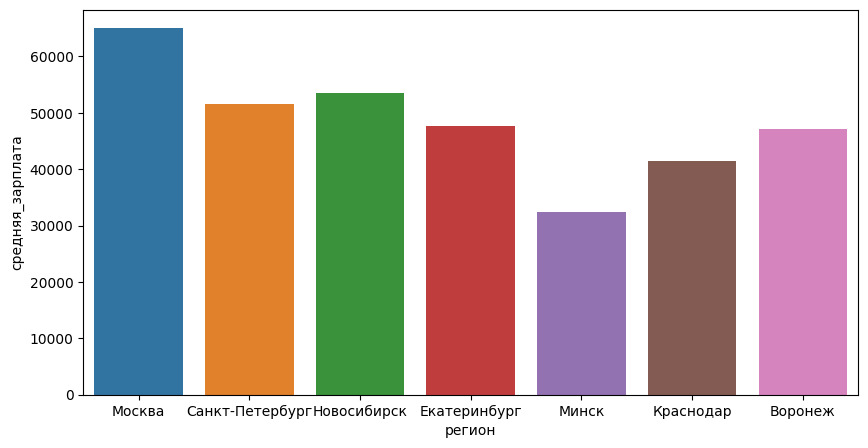

In [207]:
# Используем метод read_sql_query, чтобы получить результаты запроса в виде датафрейма.
df_6_7 = pd.read_sql_query(query_6_7, connection)

# импортируем библиотеку seaborn  и строим столбчатую диаграмму
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=df_6_7,
    x='регион',
    y='средняя_зарплата')

Видим, что в топ-7 регионов с наибольшим числом вакансий для специалистов без опыта работы входят только города-миллионники, причем самая высокая средняя зарплата ожидаемо оказалась в Москве, а вот на втором месте неожиданно оказался Новосибирск, по численности населения находящийся на 4 месте (согласно проведенному выше анализу). 

In [ ]:
# Закрываем соединение
connection.close()